[02:50:09 -0300] [INFO]: NetworkX-cuGraph is unavailable: No module named 'cupy'.
[02:50:09 -0300] [INFO]: Graph 'grafo_academico' exists.
[02:50:09 -0300] [INFO]: Default node type set to 'alunos'


Nós: 31 | Arestas: 28


[02:50:10 -0300] [INFO]: Graph 'grafo_academico' load took 0.2844374179840088s


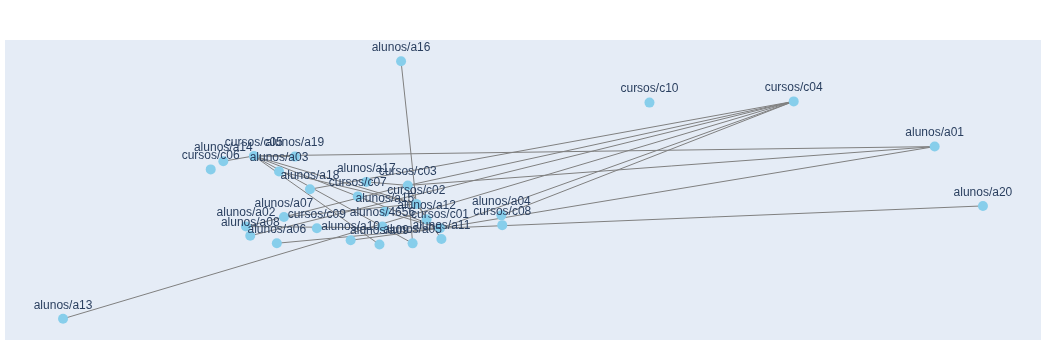

In [1]:
import os
import networkx as nx
import nx_arangodb as nxadb
import plotly.graph_objects as go

# Configura acesso via .env
from dotenv import load_dotenv
load_dotenv()
os.environ["DATABASE_HOST"] = os.getenv("ARANGO_HOST")
os.environ["DATABASE_USERNAME"] = os.getenv("ARANGO_USER")
os.environ["DATABASE_PASSWORD"] = os.getenv("ARANGO_PASS")
os.environ["DATABASE_NAME"] = os.getenv("DB_NAME")

# Carrega grafo do ArangoDB
G = nxadb.Graph(name="grafo_academico")

print("Nós:", G.number_of_nodes(), "| Arestas:", G.number_of_edges())

# Layout automático com spring
pos = nx.spring_layout(G)

# Traçado de arestas
edge_x, edge_y = [], []
for u, v in G.edges():
    x0, y0 = pos[u]; x1, y1 = pos[v]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    mode='lines', line=dict(width=1, color='grey'),
    hoverinfo='none'
)

# Traçado de nós
node_x, node_y, node_text = [], [], []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(str(node))

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text, textposition='top center',
    marker=dict(size=10, color='skyblue'),
    hoverinfo='text'
)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(showlegend=False,
                                 hovermode='closest',
                                 margin=dict(b=20, l=5, r=5, t=40),
                                 xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                                 yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
fig.show()